* Turn the warning off: 
~~~~
options(warn=-1)
~~~~
* Turn the warning back on: 
~~~~
options(warn=0)
~~~~
* reference: https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script

In [1]:
options(warn=-1)

## First step is getting the correlationship between those variables. 

In [2]:
#library(randomForest)
library(rms)
data <- read.csv('J:/EECS6414/process/Pipeline/Data_cleaning/kernel_datssource_code_3.csv')# , stringsAsFactors=FALSE

col_name <- names(data)
env_vars <- col_name
reject_vars <- c(#"kernel_datasets", # because they are all 1, so we can only get NaN. 
                 "kernel", "author", "id", "km_language", "km_tags", "cvp_import", "cvp_import_from", "km_votes", 
                "km_forks", "km_comments", "km_views"
                 #"competition", "organization" # unnecessary variables. 
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
for (env in env_vars){
   print(paste(env, "+"))
}

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



[1] "cvo_num_of_cell +"
[1] "cvo_num_of_output +"
[1] "cvo_display_data +"
[1] "cvo_stream +"
[1] "cvo_execute_result +"
[1] "cvo_error +"
[1] "cvp_sloc +"
[1] "cvp_comments +"
[1] "cvp_empty +"
[1] "cvp_mccabe +"
[1] "km_dataSources +"
[1] "km_versions +"
[1] "km_competitions +"
[1] "km_competition_size_ttl +"
[1] "km_competition_size_avg +"
[1] "km_competition_size_max +"
[1] "km_competition_size_min +"
[1] "km_competition_discussion_ttl +"
[1] "km_competition_discussion_avg +"
[1] "km_competition_discussion_max +"
[1] "km_competition_discussion_min +"
[1] "km_competition_competitor_ttl +"
[1] "km_competition_competitor_avg +"
[1] "km_competition_competitor_max +"
[1] "km_competition_competitor_min +"
[1] "km_datasets +"
[1] "km_dataset_size_ttl +"
[1] "km_dataset_size_avg +"
[1] "km_dataset_size_max +"
[1] "km_dataset_size_min +"
[1] "km_dataset_discussion_ttl +"
[1] "km_dataset_discussion_avg +"
[1] "km_dataset_discussion_max +"
[1] "km_dataset_discussion_min +"
[1] "km_dataset_ker

png 
  2

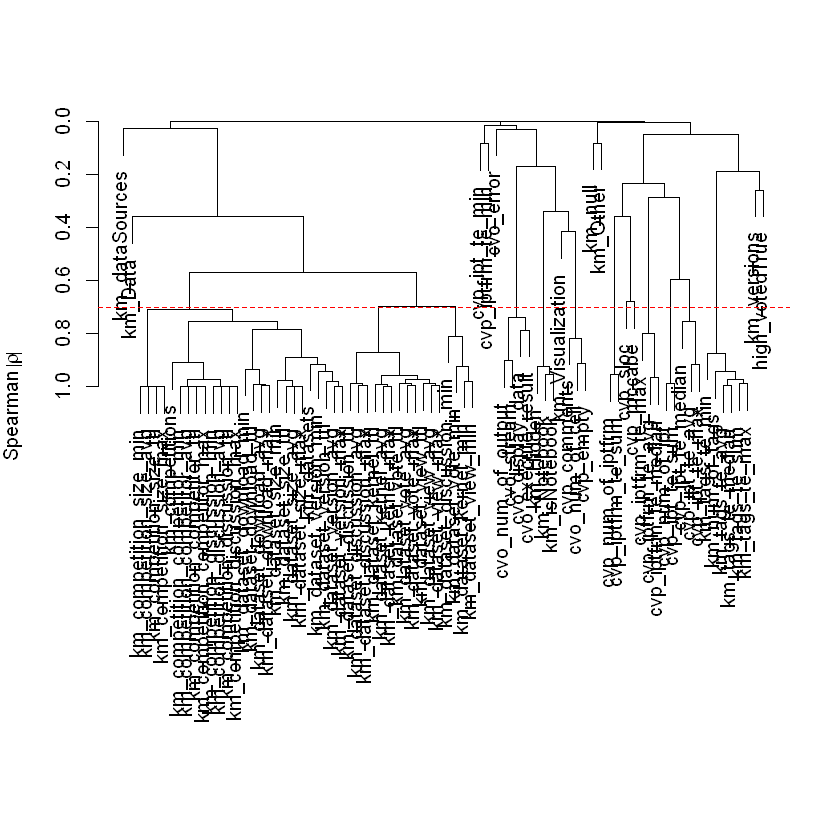

In [3]:
vcobj = varclus(~ 
cvo_num_of_cell +
cvo_num_of_output +
cvo_display_data +
cvo_stream +
cvo_execute_result +
cvo_error +
cvp_sloc +
cvp_comments +
cvp_empty +
cvp_mccabe +
km_dataSources +
km_versions +
km_competitions +
km_competition_size_ttl +
km_competition_size_avg +
km_competition_size_max +
km_competition_size_min +
km_competition_discussion_ttl +
km_competition_discussion_avg +
km_competition_discussion_max +
km_competition_discussion_min +
km_competition_competitor_ttl +
km_competition_competitor_avg +
km_competition_competitor_max +
km_competition_competitor_min +
km_datasets +
km_dataset_size_ttl +
km_dataset_size_avg +
km_dataset_size_max +
km_dataset_size_min +
km_dataset_discussion_ttl +
km_dataset_discussion_avg +
km_dataset_discussion_max +
km_dataset_discussion_min +
km_dataset_kernel_ttl +
km_dataset_kernel_avg +
km_dataset_kernel_max +
km_dataset_kernel_min +
km_dataset_download_ttl +
km_dataset_download_avg +
km_dataset_download_max +
km_dataset_download_min +
km_dataset_view_ttl +
km_dataset_view_avg +
km_dataset_view_max +
km_dataset_view_min +
km_dataset_vote_ttl +
km_dataset_vote_avg +
km_dataset_vote_max +
km_dataset_vote_min +
km_dataset_version_ttl +
km_dataset_version_avg +
km_dataset_version_max +
km_dataset_version_min +
km_Hidden +
km_Notebook +
km_null +
km_Data +
km_Visualization +
km_Other +
km_isNotebook +
high_voted +
km_num_of_tags +
km_tags_te_sum +
km_tags_te_avg +
km_tags_te_max +
km_tags_te_min +
km_tags_te_median +
cvp_num_of_ipt +
cvp_ipt_te_sum +
cvp_ipt_te_avg +
cvp_ipt_te_max +
cvp_ipt_te_min +
cvp_ipt_te_median +
cvp_num_of_iptfrm +
cvp_iptfrm_te_sum +
cvp_iptfrm_te_avg +
cvp_iptfrm_te_max +
cvp_iptfrm_te_min +
cvp_iptfrm_te_median, 
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation.pdf", width = 15, height = 15)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
# reject_vars <- c()
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [4]:
env_vars <- c("km_competition_competitor_ttl", 
              "km_dataset_vote_ttl", 
              "cvo_num_of_output",
              "km_isNotebook", 
              "cvo_num_of_cell", 
              "cvp_num_of_iptfrm",
              "cvp_num_of_ipt", 
              "cvp_ipt_te_median", 
              "km_num_of_tags"
             )
for (env in env_vars){
   print(paste(env, "+"))
}

[1] "km_competition_competitor_ttl +"
[1] "km_dataset_vote_ttl +"
[1] "cvo_num_of_output +"
[1] "km_isNotebook +"
[1] "cvo_num_of_cell +"
[1] "cvp_num_of_iptfrm +"
[1] "cvp_num_of_ipt +"
[1] "cvp_ipt_te_median +"
[1] "km_num_of_tags +"


png 
  2

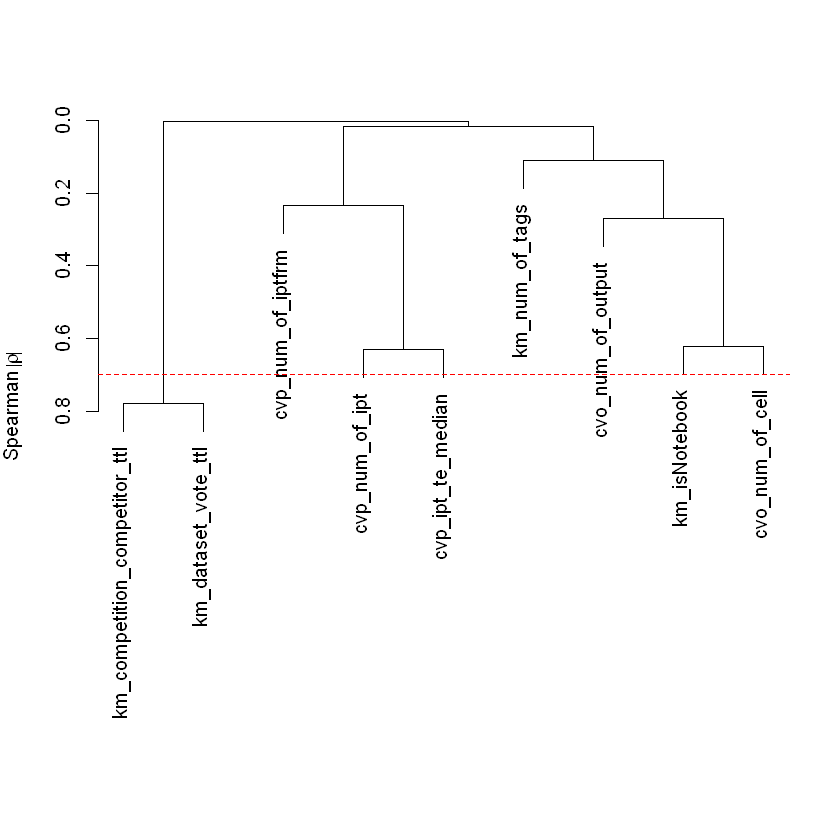

In [5]:
vcobj = varclus(~ 
km_competition_competitor_ttl +
km_dataset_vote_ttl +
cvo_num_of_output +
km_isNotebook +
cvo_num_of_cell +
cvp_num_of_iptfrm +
cvp_num_of_ipt +
cvp_ipt_te_median +
km_num_of_tags
                ,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation1.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
reject_vars <- c()
env_vars <- env_vars[!(env_vars %in% reject_vars)]

png 
  2

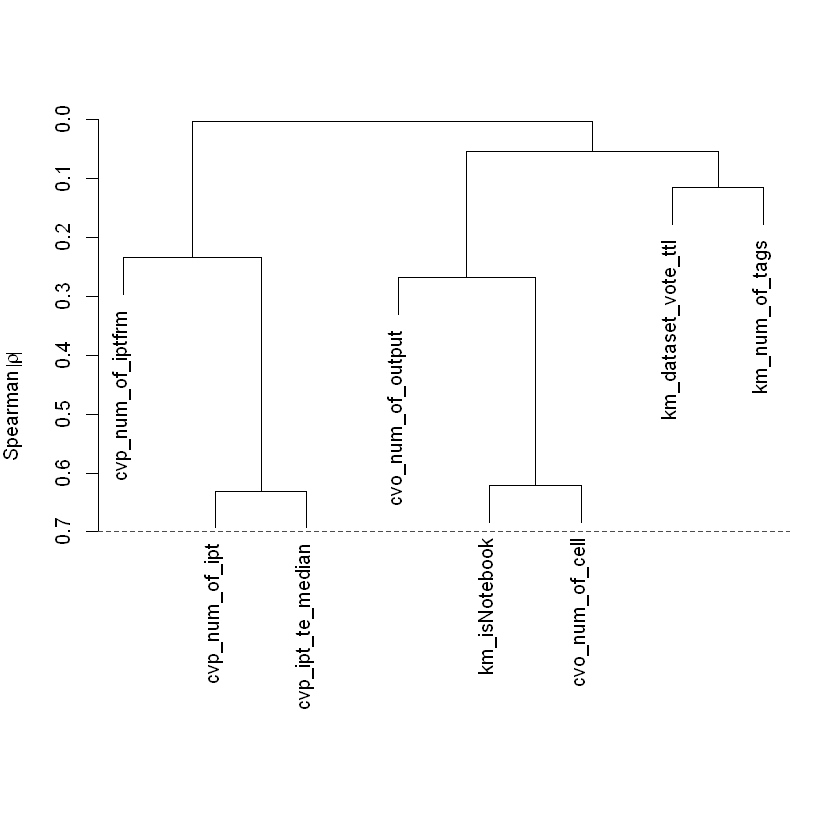

In [6]:
reject_vars <- c("km_competition_competitor_ttl")
env_vars <- env_vars[!(env_vars %in% reject_vars)]

vcobj = varclus(~ 
km_dataset_vote_ttl +
cvo_num_of_output +
km_isNotebook +
cvo_num_of_cell +
cvp_num_of_iptfrm +
cvp_num_of_ipt +
cvp_ipt_te_median +
km_num_of_tags
                ,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

## Second Step is to devide the training set and testing set

random forest model fitting referece: https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

In [7]:
env_vars_with_high_vote = append(env_vars, "high_voted")
data_lean = data[env_vars_with_high_vote]

In [8]:
head(data_lean, 5)

km_dataset_vote_ttl,cvo_num_of_output,km_isNotebook,cvo_num_of_cell,cvp_num_of_iptfrm,cvp_num_of_ipt,cvp_ipt_te_median,km_num_of_tags,high_voted
0,0,0.4918252,73,38,8,0.4982692,2,True
414,23,0.4918252,64,6,5,0.5091028,5,True
0,0,0.4918252,169,15,9,0.5236641,3,True
0,21,0.4918252,38,4,9,0.5091028,0,True
0,27,0.4918252,35,6,7,0.5091028,5,True


### binary classification: 

This step is used for generating the binary label. 

In [9]:
# delete column: votes
data_classification <- data_lean

In [10]:
head(data_classification)

km_dataset_vote_ttl,cvo_num_of_output,km_isNotebook,cvo_num_of_cell,cvp_num_of_iptfrm,cvp_num_of_ipt,cvp_ipt_te_median,km_num_of_tags,high_voted
0,0,0.4918252,73,38,8,0.4982692,2,True
414,23,0.4918252,64,6,5,0.5091028,5,True
0,0,0.4918252,169,15,9,0.5236641,3,True
0,21,0.4918252,38,4,9,0.5091028,0,True
0,27,0.4918252,35,6,7,0.5091028,5,True
0,25,0.4918252,53,13,6,0.5040770,3,True


In [11]:
summary(data_classification)

 km_dataset_vote_ttl cvo_num_of_output  km_isNotebook    cvo_num_of_cell 
 Min.   :    0.0     Min.   :   0.000   Min.   :0.4755   Min.   :  0.00  
 1st Qu.:    0.0     1st Qu.:   0.000   1st Qu.:0.4918   1st Qu.:  7.00  
 Median :    0.0     Median :   0.000   Median :0.4918   Median : 19.00  
 Mean   :  318.8     Mean   :   7.038   Mean   :0.4893   Mean   : 26.87  
 3rd Qu.:  185.0     3rd Qu.:   8.000   3rd Qu.:0.4918   3rd Qu.: 36.00  
 Max.   :16880.0     Max.   :1075.000   Max.   :0.4918   Max.   :468.00  
 cvp_num_of_iptfrm cvp_num_of_ipt   cvp_ipt_te_median km_num_of_tags  
 Min.   :  0.000   Min.   : 0.000   Min.   :0.0000    Min.   :0.0000  
 1st Qu.:  1.000   1st Qu.: 3.000   1st Qu.:0.4975    1st Qu.:0.0000  
 Median :  3.000   Median : 4.000   Median :0.5033    Median :0.0000  
 Mean   :  5.931   Mean   : 4.921   Mean   :0.5072    Mean   :0.6235  
 3rd Qu.:  8.000   3rd Qu.: 6.000   3rd Qu.:0.5135    3rd Qu.:0.0000  
 Max.   :130.000   Max.   :68.000   Max.   :1.0000    Ma

Divide the training and testing data

In [12]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_classification))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_classification)), size = smp_size)

train <- data_classification[train_ind, ]
test <- data_classification[-train_ind, ]

Then we fit the model.

In [13]:
#import the package
library(randomForest)
# Perform training:
rf_classifier2 = randomForest(as.factor(high_voted) ~ ., data=train, ntree=100, mtry=2, importance=TRUE)
# because of the as.factor(...), randomforest can fit a classification model. 
rf_classifier2

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = as.factor(high_voted) ~ ., data = train,      ntree = 100, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 37.37%
Confusion matrix:
      False True class.error
False  7780 3030   0.2802960
True   4875 5468   0.4713333

In [14]:
importance(rf_classifier2)

,False,True,MeanDecreaseAccuracy,MeanDecreaseGini
km_dataset_vote_ttl,17.741839,8.55553072,22.663091,844.33359
cvo_num_of_output,14.406076,0.01095269,15.617320,587.10895
km_isNotebook,-3.276302,5.72415518,7.014182,38.52266
cvo_num_of_cell,15.389112,7.01511194,30.449406,1098.31283
cvp_num_of_iptfrm,28.267381,-2.96577219,29.560190,793.30320
cvp_num_of_ipt,7.040933,13.65982428,26.577752,544.20671
cvp_ipt_te_median,22.220610,20.01479860,44.774583,872.90990
km_num_of_tags,39.092771,20.56135252,36.390195,564.93118


This is AUC. If the stackoverflow gave me the right answer. 

In [15]:
# import the library that needed in calculating the AUC. 
library(pROC)
library(ROCR)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [16]:
# https://stackoverflow.com/questions/46776944/how-to-calculate-randomforest-training-auc-in-r
# the train AUC
rf_p_train <- predict(rf_classifier2, type="prob")[,2]
rf_pr_train <- prediction(rf_p_train, train$high_vote)
r_auc_train <- performance(rf_pr_train, measure = "auc")@y.values[[1]] 
r_auc_train

[1] 0.677986

In [17]:
#https://stats.stackexchange.com/questions/308645/why-does-randomforest-has-higher-test-auc-than-train-auc-is-this-possible
#the test AUC
rf_p_test <- predict(rf_classifier2, type="prob", newdata = test)[,2]
rf_pr_test <- prediction(rf_p_test, test$high_vote)
r_auc_test <- performance(rf_pr_test, measure = "auc")@y.values[[1]] 
r_auc_test

[1] 0.6881417

### Logistic Regression

In [18]:
library(rms)
fit <- lrm(high_voted ~ 
km_dataset_vote_ttl +
cvo_num_of_output +
km_isNotebook +
cvo_num_of_cell +
cvp_num_of_iptfrm +
cvp_num_of_ipt +
cvp_ipt_te_median +
km_num_of_tags
           ,
           data=train, x=T, y=T)

In [19]:
val <- validate(fit, B=1000)
AUC = 0.5 + val[1,1]/2
AUC_optimism_reduced = (0.5 + val[1,5]/2)
AUC_optimism = AUC - AUC_optimism_reduced
print(c("AUC"=AUC,"AUC_optimism"=AUC_optimism))

         AUC AUC_optimism 
0.6434512055 0.0009310391 
